In [56]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/goibibo-flight-data/goibibo_flights_data.csv
/kaggle/input/goibibo-flights-dataset/goibibo_flights_data.csv


# **About Dataset:**
This comprehensive dataset offers an in-depth look into domestic flight operations in India, sourced from Goibibo. It includes a diverse range of flight information such as airlines, flight numbers, travel classes, departure and arrival cities, timings, durations, prices, and the number of stops. The data is meticulously organized to provide insights into airfare trends, travel durations, route preferences, and seasonal patterns, making it an invaluable resource for aviation analysis, travel planning, and market research.

**Description:**

This file contains detailed information about domestic flights in India for the period of July to August 2023.

**Columns:**

**flight_date:** The date of the flight in YYYY-MM-DD format.

**airline:** Name of the airline operating the flight.

**flight_num:** The flight number.

**class:** Travel class (e.g., economy, business).

**from:** Departure city.

**dep_time:** Scheduled departure time.

**to:** Arrival city.

**arr_time:** Scheduled arrival time.

**duration:** Total duration of the flight in hours and minutes.

**price:** Ticket price in Indian Rupees (INR).

**stops:** Number of stops (e.g., non-stop, 1-stop).

# **Loading Required Libraries**

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Loading Dataset**

In [58]:
data = pd.read_csv(r"/kaggle/input/goibibo-flight-data/goibibo_flights_data.csv")

In [59]:
data

,flight date,airline,flight_num,class,from,dep_time,to,arr_time,duration,price,stops,Unnamed: 11,Unnamed: 12
0,26-06-2023,SpiceJet,SG-8709,economy,Delhi,18:55,Mumbai,21:05,02h 10m,"6,013",non-stop,NaN,NaN
1,26-06-2023,SpiceJet,SG-8157,economy,Delhi,06:20,Mumbai,08:40,02h 20m,"6,013",non-stop,NaN,NaN
2,26-06-2023,AirAsia,I5-764,economy,Delhi,04:25,Mumbai,06:35,02h 10m,"6,016",non-stop,NaN,NaN
3,26-06-2023,Vistara,UK-995,economy,Delhi,10:20,Mumbai,12:35,02h 15m,"6,015",non-stop,NaN,NaN
4,26-06-2023,Vistara,UK-963,economy,Delhi,08:50,Mumbai,11:10,02h 20m,"6,015",non-stop,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
300256,13-08-2023,Vistara,UK-822,business,Chennai,09:45,Hyderabad,19:50,10h 05m,"70,304",1-stop,NaN,NaN
300257,13-08-2023,Vistara,UK-826,business,Chennai,12:30,Hyderabad,22:55,10h 25m,"78,262",1-stop,NaN,NaN
300258,13-08-2023,Vistara,UK-832,business,Chennai,07:05,Hyderabad,20:55,13h 50m,"80,285",1-stop,NaN,NaN
300259,13-08-2023,Vistara,UK-828,business,Chennai,07:00,Hyderabad,17:00,10h 00m,"82,809",1-stop,NaN,NaN


# **Data inspection**

In [60]:
data.shape

(300261, 13)

In [61]:
data.head()

,flight date,airline,flight_num,class,from,dep_time,to,arr_time,duration,price,stops,Unnamed: 11,Unnamed: 12
0,26-06-2023,SpiceJet,SG-8709,economy,Delhi,18:55,Mumbai,21:05,02h 10m,"6,013",non-stop,NaN,NaN
1,26-06-2023,SpiceJet,SG-8157,economy,Delhi,06:20,Mumbai,08:40,02h 20m,"6,013",non-stop,NaN,NaN
2,26-06-2023,AirAsia,I5-764,economy,Delhi,04:25,Mumbai,06:35,02h 10m,"6,016",non-stop,NaN,NaN
3,26-06-2023,Vistara,UK-995,economy,Delhi,10:20,Mumbai,12:35,02h 15m,"6,015",non-stop,NaN,NaN
4,26-06-2023,Vistara,UK-963,economy,Delhi,08:50,Mumbai,11:10,02h 20m,"6,015",non-stop,NaN,NaN


In [62]:
data.duplicated().sum()

2

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300261 entries, 0 to 300260
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   flight date  300261 non-null  object 
 1   airline      300261 non-null  object 
 2   flight_num   300261 non-null  object 
 3   class        300261 non-null  object 
 4   from         300261 non-null  object 
 5   dep_time     300261 non-null  object 
 6   to           300261 non-null  object 
 7   arr_time     300261 non-null  object 
 8   duration     300261 non-null  object 
 9   price        300261 non-null  object 
 10  stops        300261 non-null  object 
 11  Unnamed: 11  0 non-null       float64
 12  Unnamed: 12  0 non-null       float64
dtypes: float64(2), object(11)
memory usage: 29.8+ MB


In [64]:
data.isnull().sum()

flight date         0
airline             0
flight_num          0
class               0
from                0
dep_time            0
to                  0
arr_time            0
duration            0
price               0
stops               0
Unnamed: 11    300261
Unnamed: 12    300261
dtype: int64

In [65]:
data.describe()

,Unnamed: 11,Unnamed: 12
count,0.0,0.0
mean,NaN,NaN
std,NaN,NaN
min,NaN,NaN
25%,NaN,NaN
50%,NaN,NaN
75%,NaN,NaN
max,NaN,NaN


# **Data Cleaning**

In [66]:
data.drop(["Unnamed: 11","Unnamed: 12"],axis=1,inplace=True)

In [67]:
data.isnull().sum()

flight date    0
airline        0
flight_num     0
class          0
from           0
dep_time       0
to             0
arr_time       0
duration       0
price          0
stops          0
dtype: int64

In [68]:
data.drop_duplicates(inplace=True)

In [69]:
data.duplicated().sum()

0

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300259 entries, 0 to 300260
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   flight date  300259 non-null  object
 1   airline      300259 non-null  object
 2   flight_num   300259 non-null  object
 3   class        300259 non-null  object
 4   from         300259 non-null  object
 5   dep_time     300259 non-null  object
 6   to           300259 non-null  object
 7   arr_time     300259 non-null  object
 8   duration     300259 non-null  object
 9   price        300259 non-null  object
 10  stops        300259 non-null  object
dtypes: object(11)
memory usage: 27.5+ MB


In [71]:
data["arr_time"]

0         21:05
1         08:40
2         06:35
3         12:35
4         11:10
          ...  
300256    19:50
300257    22:55
300258    20:55
300259    17:00
300260    19:50
Name: arr_time, Length: 300259, dtype: object

In [72]:
data["price"] = data["price"].str.replace(",","")

In [73]:
data["price"]= data["price"].astype(int)

In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300259 entries, 0 to 300260
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   flight date  300259 non-null  object
 1   airline      300259 non-null  object
 2   flight_num   300259 non-null  object
 3   class        300259 non-null  object
 4   from         300259 non-null  object
 5   dep_time     300259 non-null  object
 6   to           300259 non-null  object
 7   arr_time     300259 non-null  object
 8   duration     300259 non-null  object
 9   price        300259 non-null  int64 
 10  stops        300259 non-null  object
dtypes: int64(1), object(10)
memory usage: 27.5+ MB


In [75]:
data["flight date"] = pd.to_datetime(data["flight date"])

In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300259 entries, 0 to 300260
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   flight date  300259 non-null  datetime64[ns]
 1   airline      300259 non-null  object        
 2   flight_num   300259 non-null  object        
 3   class        300259 non-null  object        
 4   from         300259 non-null  object        
 5   dep_time     300259 non-null  object        
 6   to           300259 non-null  object        
 7   arr_time     300259 non-null  object        
 8   duration     300259 non-null  object        
 9   price        300259 non-null  int64         
 10  stops        300259 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 27.5+ MB


In [77]:
data["Total_Duration"] = data["duration"].str.replace("h",".").str.replace(" ","").str.replace("m","")

In [78]:
data["Total_Duration"] = data["Total_Duration"].str.strip().str.rstrip('.')

In [79]:
data["Total_Duration"] = data["Total_Duration"].astype(float)

In [80]:
data

,flight date,airline,flight_num,class,from,dep_time,to,arr_time,duration,price,stops,Total_Duration
0,2023-06-26,SpiceJet,SG-8709,economy,Delhi,18:55,Mumbai,21:05,02h 10m,6013,non-stop,2.10
1,2023-06-26,SpiceJet,SG-8157,economy,Delhi,06:20,Mumbai,08:40,02h 20m,6013,non-stop,2.20
2,2023-06-26,AirAsia,I5-764,economy,Delhi,04:25,Mumbai,06:35,02h 10m,6016,non-stop,2.10
3,2023-06-26,Vistara,UK-995,economy,Delhi,10:20,Mumbai,12:35,02h 15m,6015,non-stop,2.15
4,2023-06-26,Vistara,UK-963,economy,Delhi,08:50,Mumbai,11:10,02h 20m,6015,non-stop,2.20
...,...,...,...,...,...,...,...,...,...,...,...,...
300256,2023-08-13,Vistara,UK-822,business,Chennai,09:45,Hyderabad,19:50,10h 05m,70304,1-stop,10.05
300257,2023-08-13,Vistara,UK-826,business,Chennai,12:30,Hyderabad,22:55,10h 25m,78262,1-stop,10.25
300258,2023-08-13,Vistara,UK-832,business,Chennai,07:05,Hyderabad,20:55,13h 50m,80285,1-stop,13.50
300259,2023-08-13,Vistara,UK-828,business,Chennai,07:00,Hyderabad,17:00,10h 00m,82809,1-stop,10.00


In [81]:
data.isnull().sum()

flight date       0
airline           0
flight_num        0
class             0
from              0
dep_time          0
to                0
arr_time          0
duration          0
price             0
stops             0
Total_Duration    0
dtype: int64

In [82]:
data["stops"].value_counts()

stops
1-stop                                                                          243601
non-stop                                                                         36044
2+-stop                                                                          13288
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IXU\n\t\t\t\t\t\t\t\t\t\t\t\t                 1839
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IDR\n\t\t\t\t\t\t\t\t\t\t\t\t                 1398
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Patna\n\t\t\t\t\t\t\t\t\t\t\t\t                674
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Indore\n\t\t\t\t\t\t\t\t\t\t\t\t               381
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia PAT\n\t\t\t\t\t\t\t\t\t\t\t\t                  354
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia MYQ\n\t\t\t\t\t\t\t\t\t\t\t\t                  321
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Bhubaneswar\n\t\t\t\t\t\t\t\t\t\t\t\t          301
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia KLH\n\t\t\t\t\t\t\t\t\t\t\t\t                  284
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia J

In [83]:
data["stops"] = data["stops"].replace("non-stop","0")

In [84]:
data["stops"] = data["stops"].replace("1-stop","1")


In [85]:
data["stops"] = data["stops"].replace(['1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IXU\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Chennai\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Indore\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia RPR\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Lucknow\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia GOP\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Raipur\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Nagpur\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Surat\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Hyderabad\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia STV\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IDR\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia VTZ\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Guwahati\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia NAG\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Vishakhapatnam\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia NDC\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IXE\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Patna\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia PAT\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Mangalore\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Mumbai\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia KLH\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia MYQ\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Kolkata\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Delhi\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Kolhapur\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia JRG\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Bhubaneswar\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Ranchi\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IXR\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia JGB\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia BBI\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Mysore\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia GAY\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia GAU\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia HYD\n\t\t\t\t\t\t\t\t\t\t\t\t'],"1")

In [86]:
data["stops"] = data["stops"].replace("2+-stop","2")

In [87]:
data["stops"].unique()

array(['0', '1', '2'], dtype=object)

In [88]:
data["year"] = data['flight date'].dt.year
data["Month"] = data['flight date'].dt.month

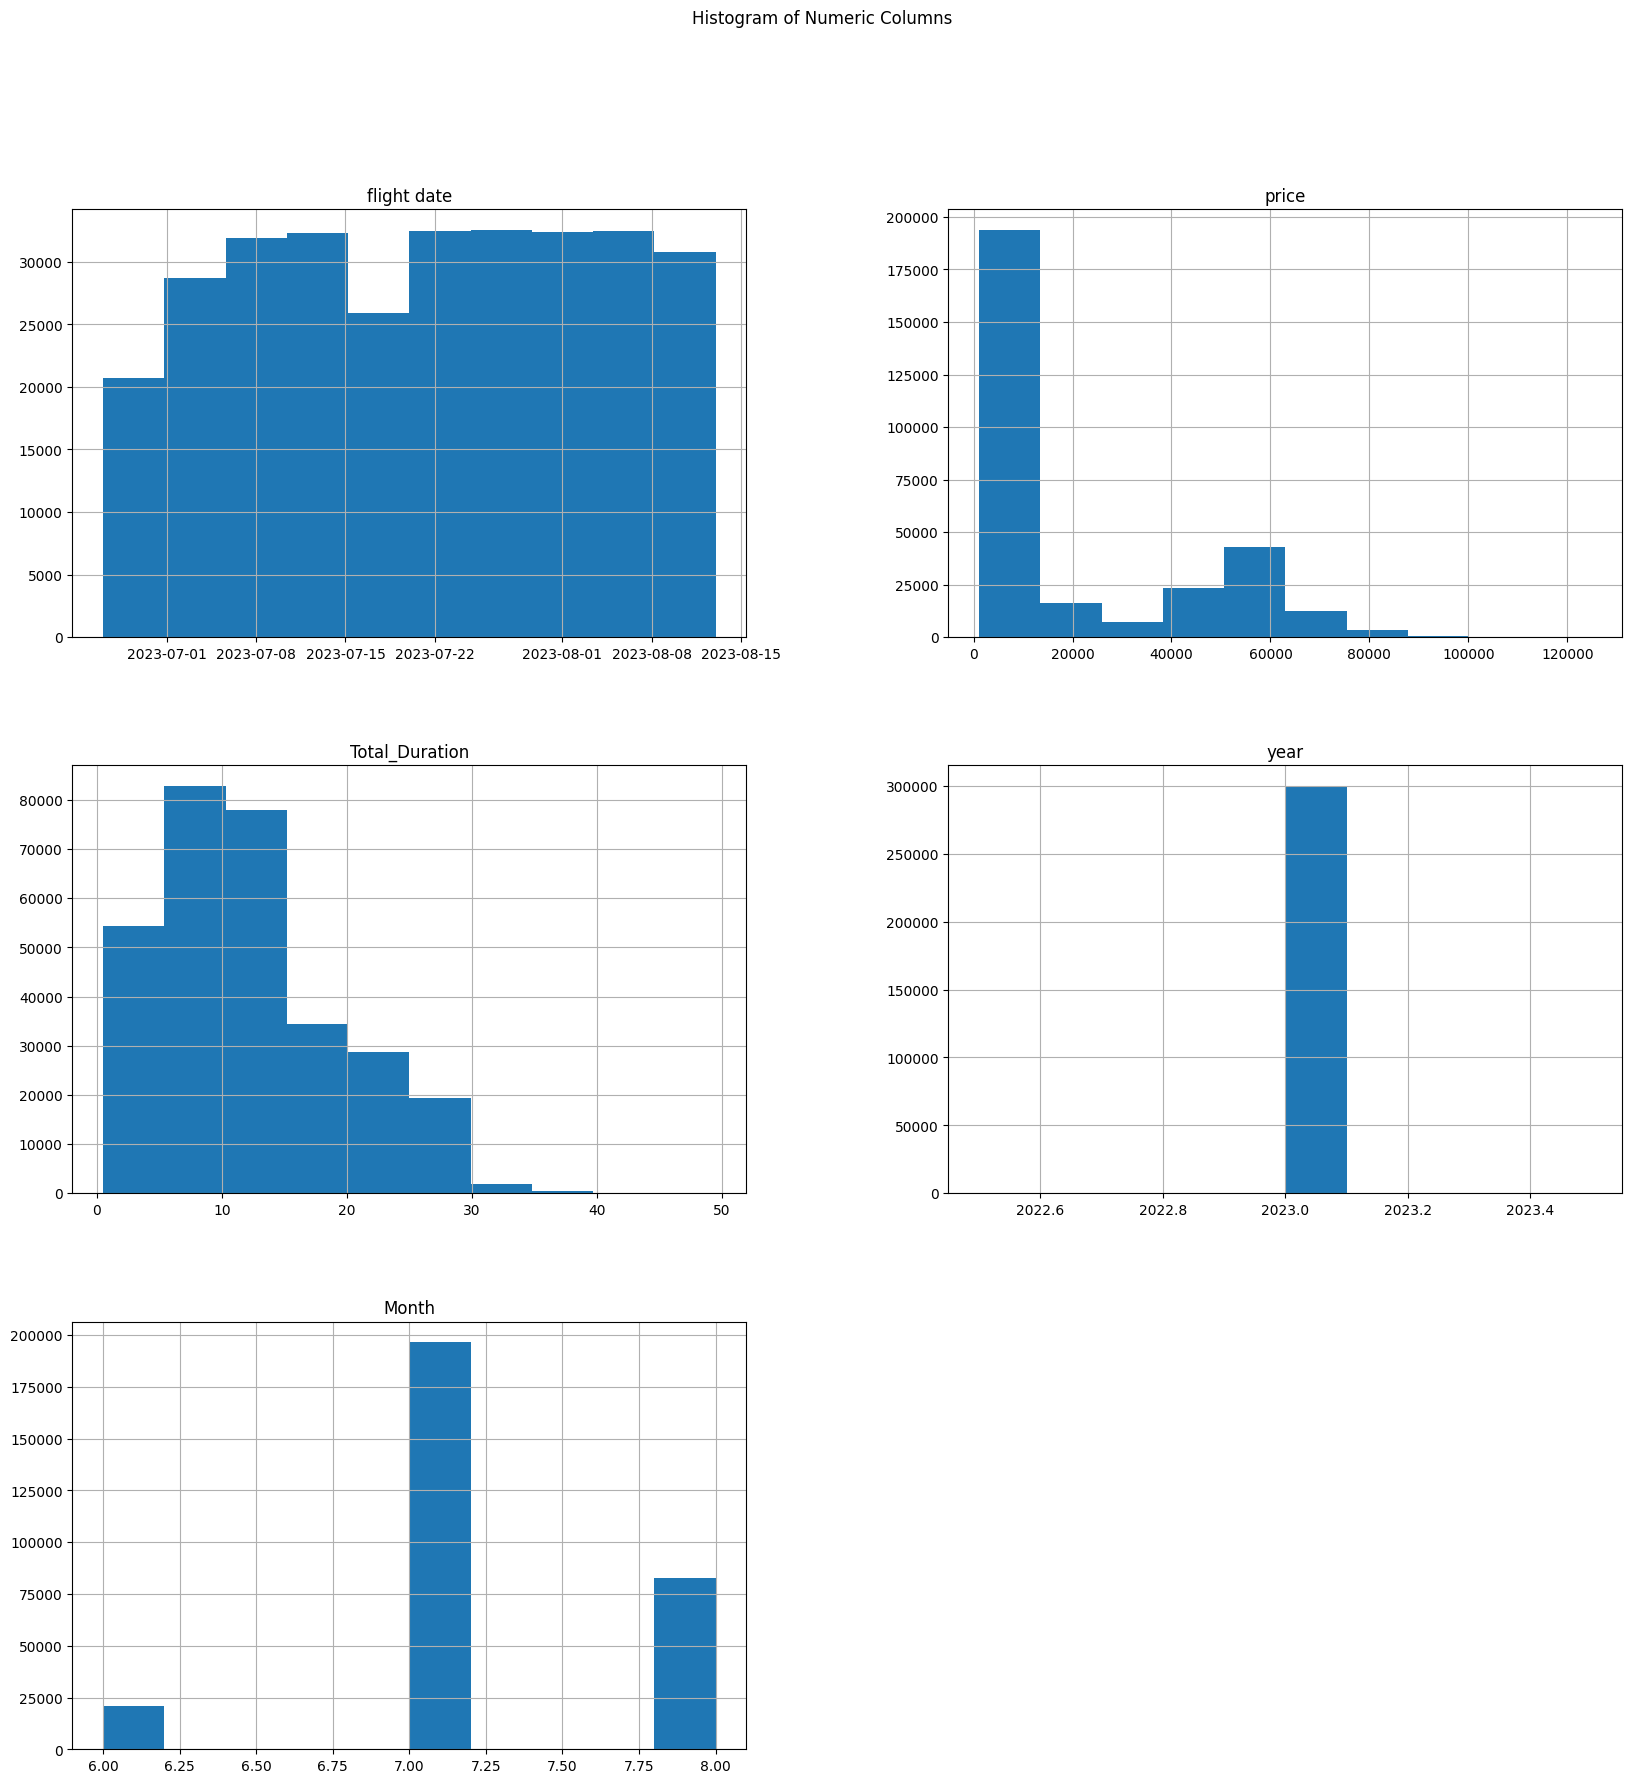

In [89]:
data.hist(bins=10, figsize=(20, 20))
plt.suptitle('Histogram of Numeric Columns')
plt.show()

In [90]:
data

,flight date,airline,flight_num,class,from,dep_time,to,arr_time,duration,price,stops,Total_Duration,year,Month
0,2023-06-26,SpiceJet,SG-8709,economy,Delhi,18:55,Mumbai,21:05,02h 10m,6013,0,2.10,2023,6
1,2023-06-26,SpiceJet,SG-8157,economy,Delhi,06:20,Mumbai,08:40,02h 20m,6013,0,2.20,2023,6
2,2023-06-26,AirAsia,I5-764,economy,Delhi,04:25,Mumbai,06:35,02h 10m,6016,0,2.10,2023,6
3,2023-06-26,Vistara,UK-995,economy,Delhi,10:20,Mumbai,12:35,02h 15m,6015,0,2.15,2023,6
4,2023-06-26,Vistara,UK-963,economy,Delhi,08:50,Mumbai,11:10,02h 20m,6015,0,2.20,2023,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300256,2023-08-13,Vistara,UK-822,business,Chennai,09:45,Hyderabad,19:50,10h 05m,70304,1,10.05,2023,8
300257,2023-08-13,Vistara,UK-826,business,Chennai,12:30,Hyderabad,22:55,10h 25m,78262,1,10.25,2023,8
300258,2023-08-13,Vistara,UK-832,business,Chennai,07:05,Hyderabad,20:55,13h 50m,80285,1,13.50,2023,8
300259,2023-08-13,Vistara,UK-828,business,Chennai,07:00,Hyderabad,17:00,10h 00m,82809,1,10.00,2023,8


# **Explorotary Data analysis**

**Number of Airline Flights**)


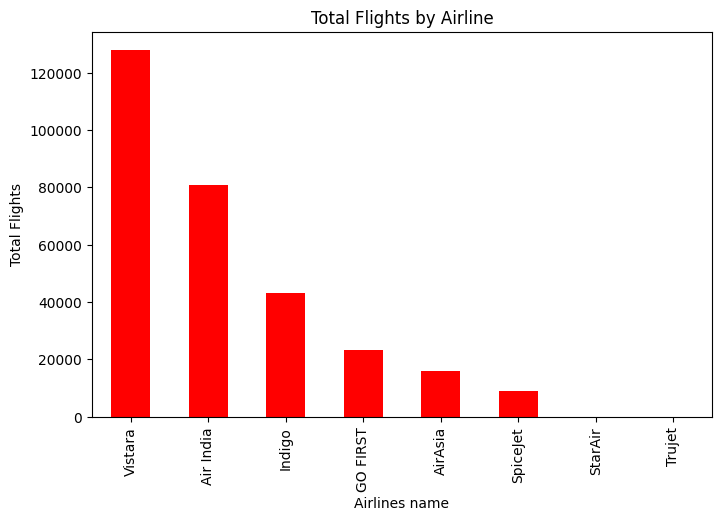

In [147]:
plt.figure(figsize=(8, 5))
data["airline"].value_counts().plot(kind="bar" , color = "red")
plt.title("Total Flights by Airline")
plt.xlabel("Airlines name")
plt.ylabel("Total Flights")
plt.show()

**Number of Flights by flight Class**

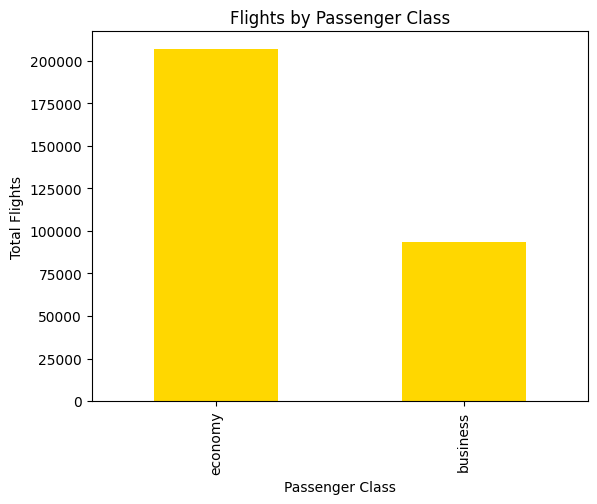

In [148]:
data["class"].value_counts().plot(kind="bar" , color="gold")
plt.title("Flights by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Total Flights")
plt.show()

**Number of Airline Flights**

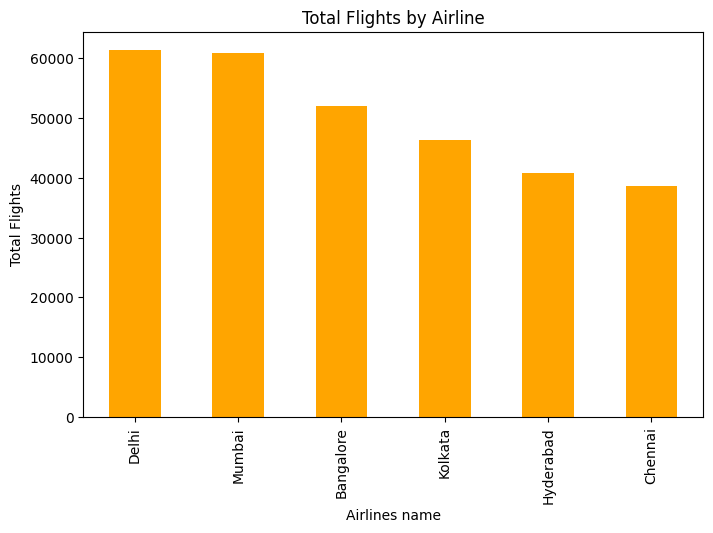

In [93]:
plt.figure(figsize=(8, 5))
data["from"].value_counts().plot(kind="bar",color="orange")
plt.title("Total Flights by Airline")
plt.xlabel("Airlines name")
plt.ylabel("Total Flights")
plt.show()

**Total Number of flights**

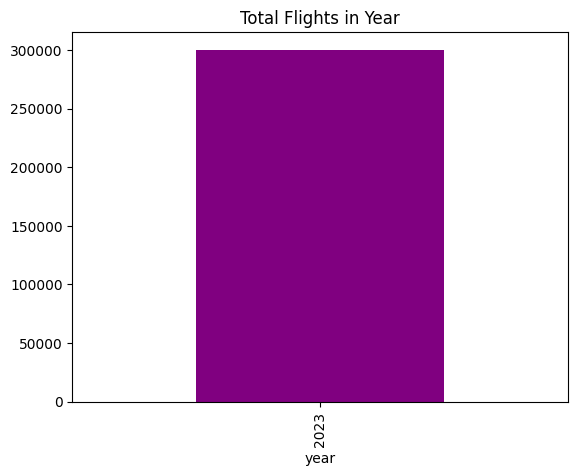

In [149]:
data['year'].value_counts().sort_index().plot(kind='bar',color="purple" , title='Total Flights in Year')
plt.show()


**Total Flights by each Month**

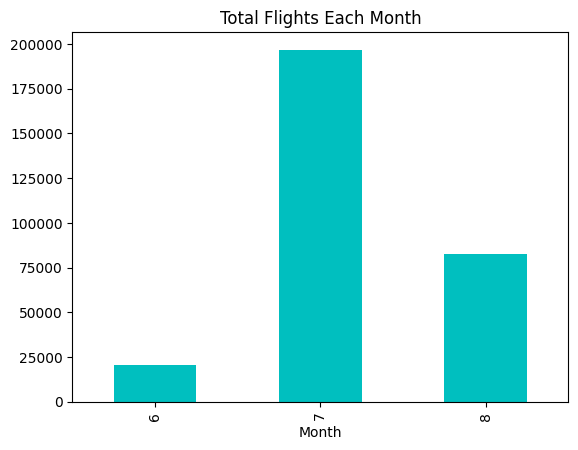

In [154]:
data['Month'].value_counts().sort_index().plot(kind='bar',color="#00bfbf", title='Total Flights Each Month')
plt.show()

**Total Number of Flights Departured from City**

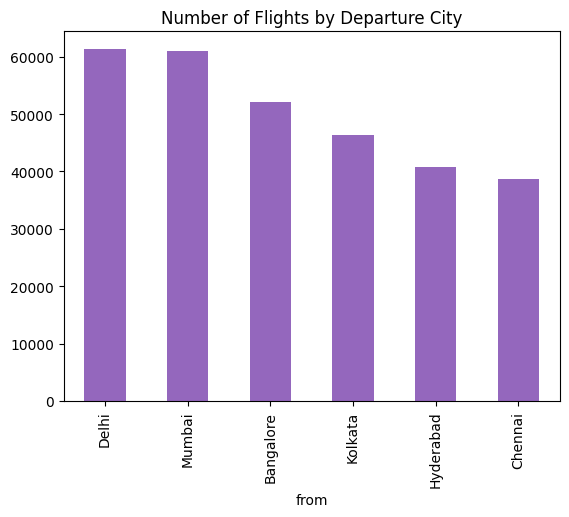

In [155]:
data['from'].value_counts().plot(kind='bar',color="#9467bd", title='Number of Flights by Departure City')
plt.show()


**Total Number of Flights Departured To City**

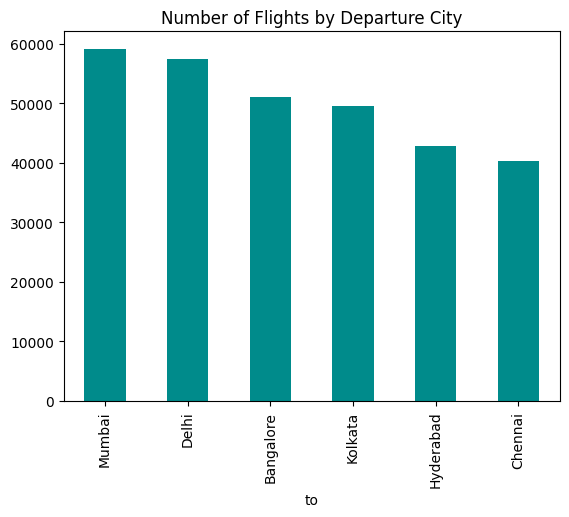

In [157]:
data['to'].value_counts().plot(kind='bar',color="darkcyan", title='Number of Flights by Departure City')
plt.show()

In [98]:
import warnings
warnings.filterwarnings("ignore")

**Numbers of Flights by Time **

**Numbers of Flights by Time**

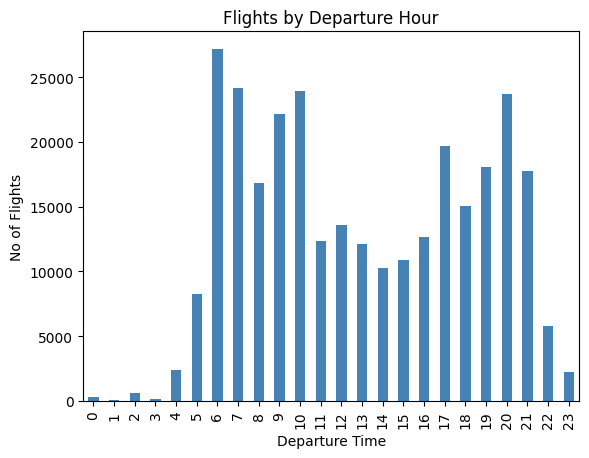

In [162]:
pd.to_datetime(data['dep_time'], errors='coerce').dt.hour
pd.to_datetime(data['dep_time'], errors='coerce').dt.hour.value_counts().sort_index()
pd.to_datetime(data['dep_time'], errors='coerce').dt.hour.value_counts().sort_index().plot(kind='bar',color="steelblue",title='Flights by Departure Hour')
plt.xlabel("Departure Time")
plt.ylabel("No of Flights")
plt.show()

**Flight Duration Distribution**

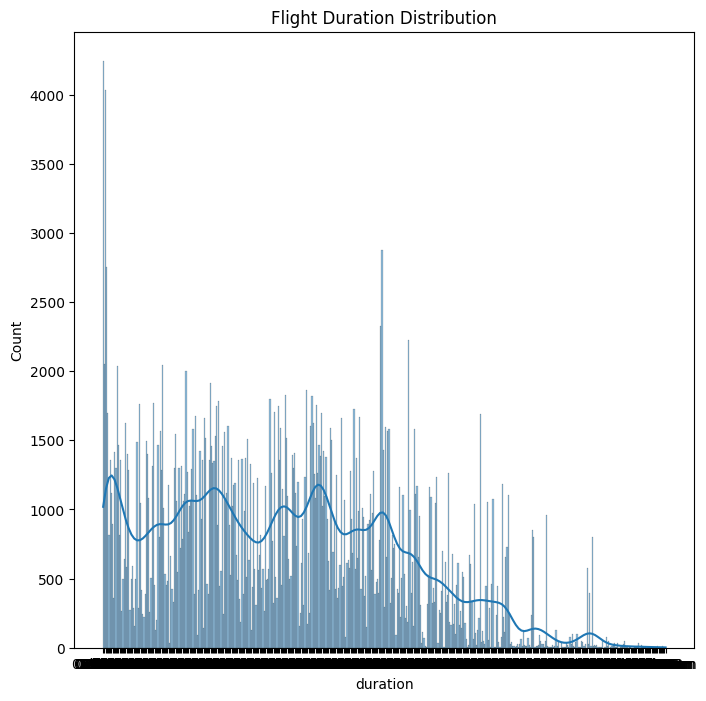

In [100]:
plt.figure(figsize=(8, 8))
sns.histplot(data['duration'], kde=True)
plt.title('Flight Duration Distribution')
plt.show()

**Number of Stops in Flights**

In [101]:
data["stops"].value_counts()

stops
1    250927
0     36044
2     13288
Name: count, dtype: int64

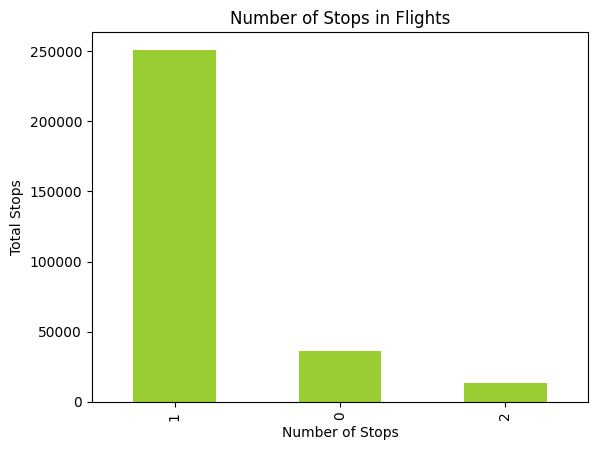

In [163]:
data['stops'].value_counts()
data['stops'].value_counts().plot(kind='bar',color="yellowgreen", title='Number of Stops in Flights')
plt.xlabel("Number of Stops")
plt.ylabel("Total Stops")
plt.show()


**Average Flight Price**

Average Price: 21174.447460359224


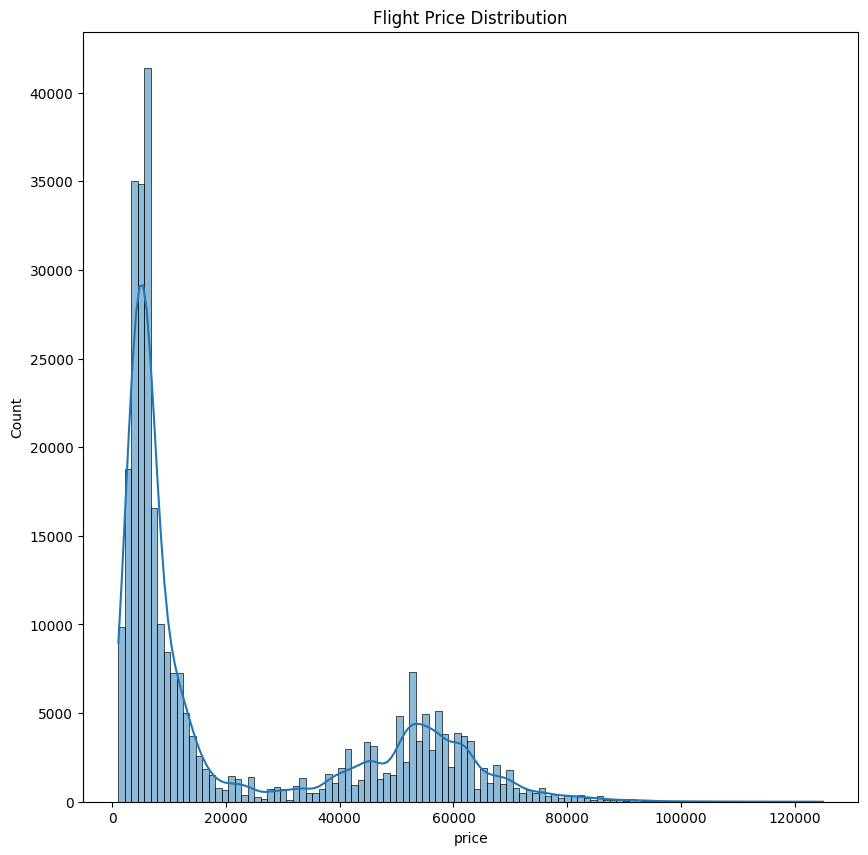

In [103]:
plt.figure(figsize=(10,10))
print("Average Price:", data['price'].mean())
sns.histplot(data['price'], kde=True)
plt.title('Flight Price Distribution')
plt.show()

**Number of Airline Flights by Each Months**

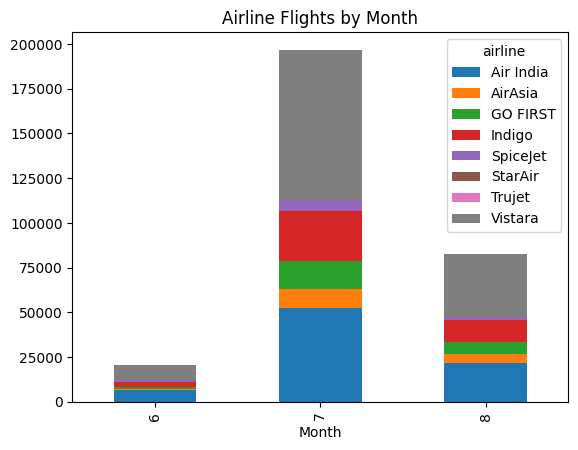

In [104]:
data.groupby(['Month', 'airline']).size().unstack()
data.groupby(['Month', 'airline']).size().unstack().plot(kind='bar', stacked=True, title='Airline Flights by Month')
plt.show()


**Number of Flight Class by each Month**

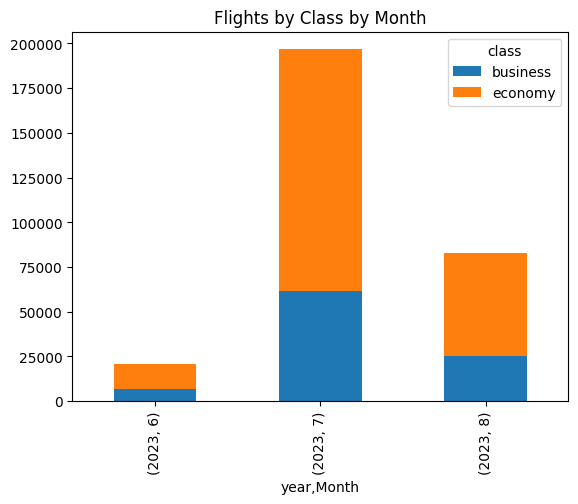

In [105]:
data.groupby(['year', 'Month', 'class']).size().unstack().plot(kind='bar', stacked=True, title='Flights by Class by Month')
plt.show()

In [106]:
data

,flight date,airline,flight_num,class,from,dep_time,to,arr_time,duration,price,stops,Total_Duration,year,Month
0,2023-06-26,SpiceJet,SG-8709,economy,Delhi,18:55,Mumbai,21:05,02h 10m,6013,0,2.10,2023,6
1,2023-06-26,SpiceJet,SG-8157,economy,Delhi,06:20,Mumbai,08:40,02h 20m,6013,0,2.20,2023,6
2,2023-06-26,AirAsia,I5-764,economy,Delhi,04:25,Mumbai,06:35,02h 10m,6016,0,2.10,2023,6
3,2023-06-26,Vistara,UK-995,economy,Delhi,10:20,Mumbai,12:35,02h 15m,6015,0,2.15,2023,6
4,2023-06-26,Vistara,UK-963,economy,Delhi,08:50,Mumbai,11:10,02h 20m,6015,0,2.20,2023,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300256,2023-08-13,Vistara,UK-822,business,Chennai,09:45,Hyderabad,19:50,10h 05m,70304,1,10.05,2023,8
300257,2023-08-13,Vistara,UK-826,business,Chennai,12:30,Hyderabad,22:55,10h 25m,78262,1,10.25,2023,8
300258,2023-08-13,Vistara,UK-832,business,Chennai,07:05,Hyderabad,20:55,13h 50m,80285,1,13.50,2023,8
300259,2023-08-13,Vistara,UK-828,business,Chennai,07:00,Hyderabad,17:00,10h 00m,82809,1,10.00,2023,8


**Departure Time by Date**

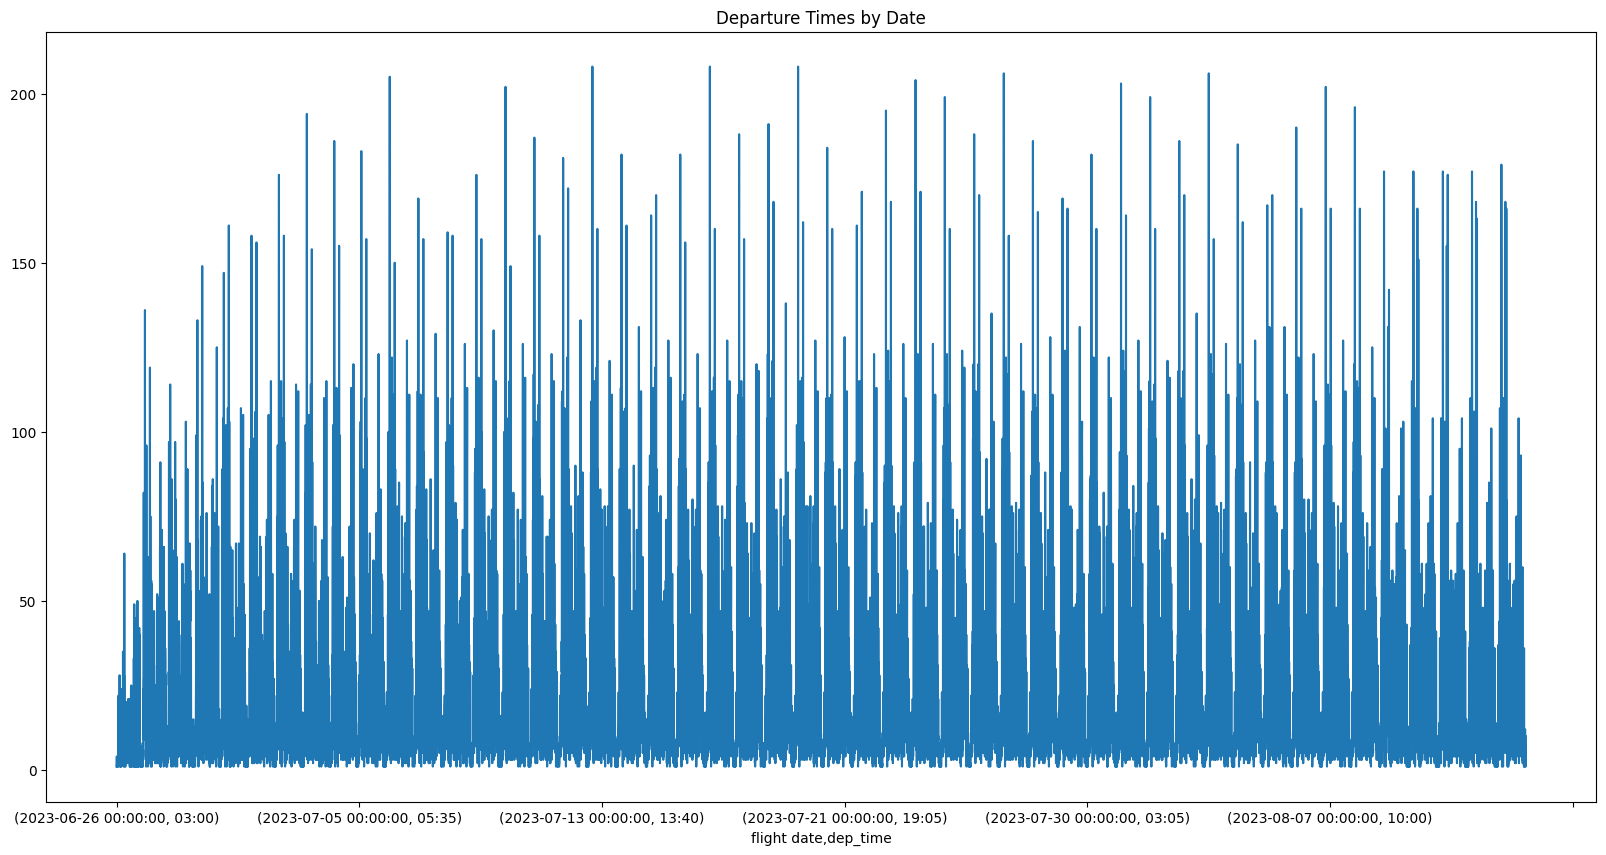

In [107]:
plt.figure(figsize=(20,10))
data.groupby(['flight date','dep_time']).size().plot(kind='line', title='Departure Times by Date')
plt.show()

**Airlines with Class by each Month**

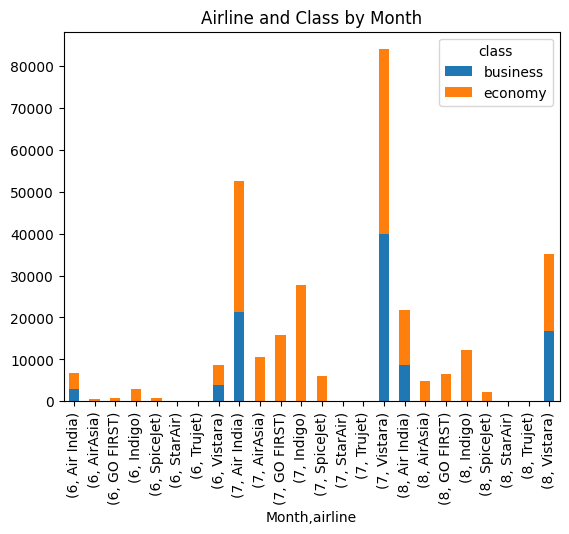

In [112]:
data.groupby(['Month', 'airline', 'class']).size().unstack().plot(kind='bar', stacked=True, title='Airline and Class by Month')
plt.show()

**Flight Class with Number of stops by Each Month**

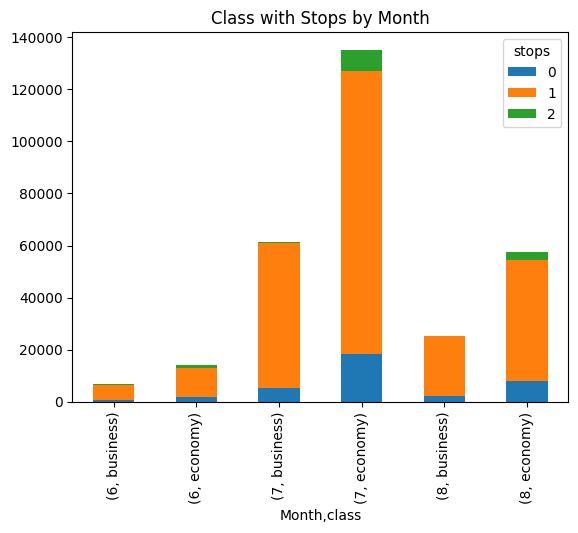

In [113]:
data.groupby(['Month', 'class', 'stops']).size().unstack().plot(kind='bar', stacked=True, title='Class with Stops by Month')
plt.show()


**Airline with Flight Price by Month**

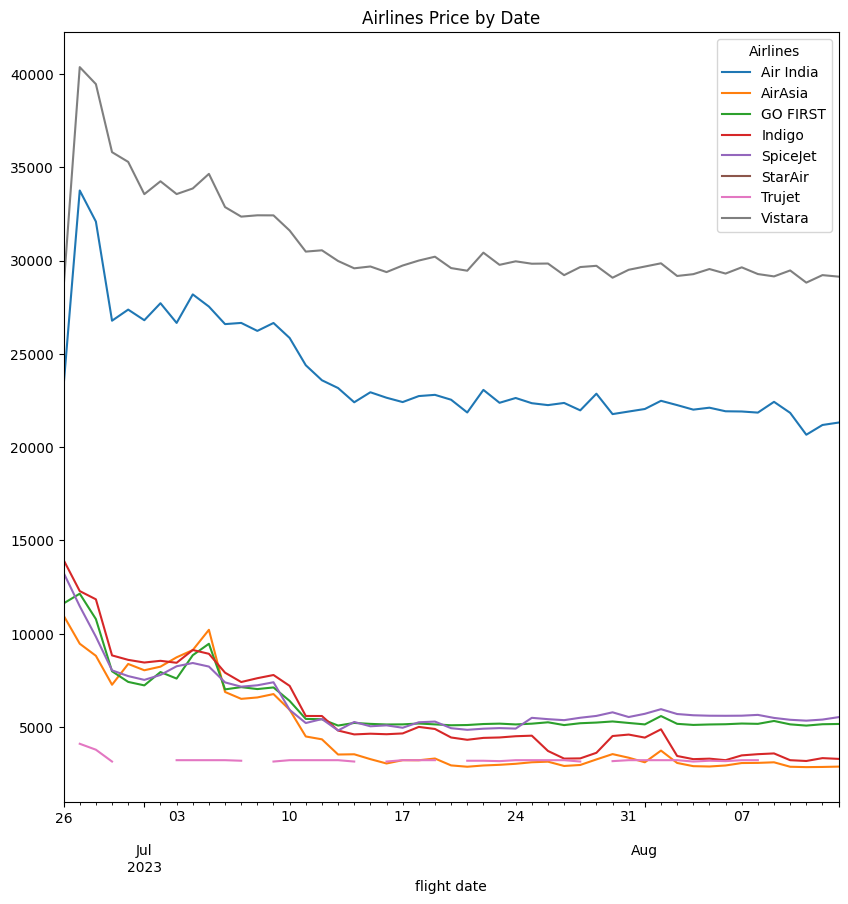

In [121]:
data.groupby(['flight date', 'airline'])['price'].mean().unstack().plot(kind='line', title='Airlines Price by Date', figsize=(10, 10))
plt.legend(title='Airlines', loc='upper right')
plt.show()

**Average Price between Two Cities**

In [132]:
data.groupby(['from', 'to'])['price'].mean().reset_index()
print(data.groupby(['from', 'to'])['price'].mean().reset_index())

         from         to         price
0   Bangalore    Chennai  23648.828861
1   Bangalore      Delhi  17966.991131
2   Bangalore  Hyderabad  21448.221380
3   Bangalore    Kolkata  23825.431449
4   Bangalore     Mumbai  23452.636708
5     Chennai  Bangalore  25436.195441
6     Chennai      Delhi  19244.722273
7     Chennai  Hyderabad  21895.662297
8     Chennai    Kolkata  22983.775168
9     Chennai     Mumbai  23085.325230
10      Delhi  Bangalore  18126.072010
11      Delhi    Chennai  19638.712801
12      Delhi  Hyderabad  17586.272084
13      Delhi    Kolkata  20849.443271
14      Delhi     Mumbai  19626.377984
15  Hyderabad  Bangalore  21544.212206
16  Hyderabad    Chennai  22156.218765
17  Hyderabad      Delhi  17479.782767
18  Hyderabad    Kolkata  21112.165394
19  Hyderabad     Mumbai  20346.055396
20    Kolkata  Bangalore  23059.838355
21    Kolkata    Chennai  23988.229821
22    Kolkata      Delhi  19687.070150
23    Kolkata  Hyderabad  21796.215778
24    Kolkata     Mumbai 

<Figure size 1000x1000 with 0 Axes>

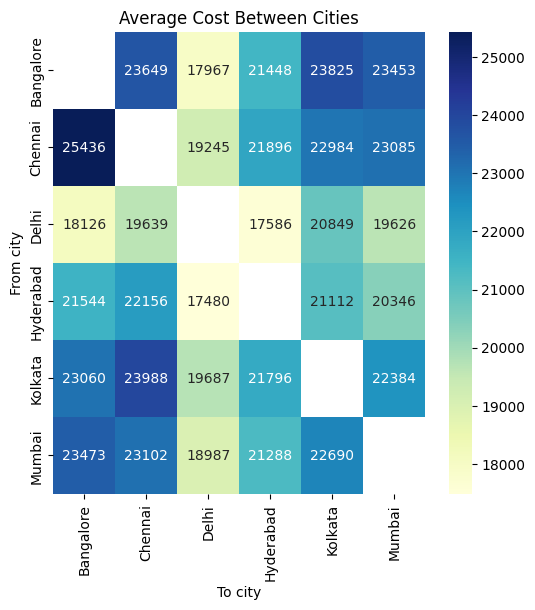

In [143]:
plt.figure(figsize=(6, 6))
h = data.pivot_table(values='price', index='from', columns='to', aggfunc='mean')
sns.heatmap(h, cmap="YlGnBu", annot=True, fmt="0.0f")
plt.title("Average Cost Between Cities")
plt.xlabel("To city")
plt.ylabel("From city")
plt.show()